In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(59537, 246)

In [5]:
lsl_dr[(lsl_dr.autism==1) & (lsl_dr.hl==0)].shape

(169, 246)

Exclusions

In [4]:
lsl_dr.drop_duplicates(subset='study_id').autism.sum()

49

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.autism==1)))

In [6]:
inclusions = lsl_dr[inclusion_mask].drop_duplicates(subset='study_id')
inclusions.shape

(33, 246)

(array([4., 8., 7., 6., 4., 2., 2.]),
 array([0.08333333, 1.05952381, 2.03571429, 3.01190476, 3.98809524,
        4.96428571, 5.94047619, 6.91666667]),
 <a list of 7 Patch objects>)

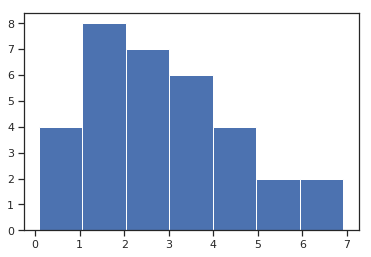

In [7]:
plt.hist(inclusions.age/12, bins=7)

In [8]:
inclusions.to_csv('../data/clean/autism.csv')

## Demographics

In [9]:
inclusions.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      24
Female     9
Name: male, dtype: int64

In [10]:
inclusions.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       21
Other        6
Black        3
Asian        2
Hispanic     1
Name: race, dtype: int64

In [11]:
(inclusions.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    23
<36 weeks     10
Name: premature_age, dtype: int64

In [12]:
inclusions.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1           9
2          14
3           5
4+          1
Missing     4
Name: sib, dtype: int64

In [13]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

inclusions.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    13
Unknown                    10
Some college                6
Some high school            4
Name: mother_ed, dtype: int64

In [14]:
inclusions.father_ed.replace(ed_lookup).value_counts()

Unknown                    13
Bachelor's degree          11
Post graduate degree        5
Some college                3
High school diploma/GED     1
Name: father_ed, dtype: int64

In [15]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

inclusions.family_inv.replace(family_lookup).value_counts()

Average Participation    12
Ideal Participation      11
Missing                   5
Good Participation        3
Below Average             2
Name: family_inv, dtype: int64

In [16]:
inclusions[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,31.000000,30.000000,25.00000,33.000000
mean,17.000000,20.800000,21.08000,34.060606
std,17.716283,17.870029,17.83704,19.805207
min,0.000000,1.000000,1.00000,1.000000
25%,2.500000,5.250000,7.00000,20.000000
50%,18.000000,19.500000,20.00000,33.000000
75%,22.000000,27.500000,26.00000,46.000000
max,83.000000,83.000000,83.00000,83.000000


In [17]:
inclusions.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    22
OPTION only          7
Name: otherserv, dtype: int64

## Hearing loss

In [18]:
inclusions.degree_hl_ad.isnull().sum()

2

In [19]:
inclusions.degree_hl_as.isnull().sum()

2

In [20]:
inclusions.degree_hl_ad.value_counts()

6.0    16
3.0     6
4.0     4
5.0     3
1.0     1
2.0     1
Name: degree_hl_ad, dtype: int64

In [21]:
inclusions.degree_hl_as.value_counts()

6.0    14
3.0     5
2.0     5
5.0     4
0.0     2
4.0     1
Name: degree_hl_as, dtype: int64

In [22]:
hl_data = inclusions.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [23]:
inclusions.one_or_both_parent_hl.value_counts()

0.0    27
1.0     2
Name: one_or_both_parent_hl, dtype: int64

In [24]:
inclusions.one_or_both_parent_hl.isnull().sum()

4

In [25]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      27
assymetrical         1
unilateral_mixed     1
unilateral_snhl      1
bilateral_mixed      1
unilateral_unk       0
unilateral_cond      0
unilateral_ansd      0
bilateral_unk        0
bilateral_normal     0
bilateral_cond       0
bilateral_ansd       0
dtype: int64

In [26]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.82
assymetrical        0.03
unilateral_mixed    0.03
unilateral_snhl     0.03
bilateral_mixed     0.03
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [27]:
tech_data = inclusions.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [28]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        22
bilateral_ha         6
unilateral_ci        4
bimodal              1
unilateral_other     0
unilateral_ha        0
bilateral_other      0
dtype: int64

In [29]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.67
bilateral_ha        0.18
unilateral_ci       0.12
bimodal             0.03
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [30]:
tech_data[tech_data.sum(1)==0].index.values

array([], dtype=object)

## Summary of scores by domain

In [31]:
inclusions.head()

,redcap_event_name,academic_year_rv,hl,male,_race,prim_lang,sib,_mother_ed,father_ed,par1_ed,...,gf3_sis_ss,gf3_siw_ss,gf_version,ppvt_f,ppvt_ss,rowpvt_ss,school,score,test_name,test_type
181,initial_assessment_arm_1,2018.0,0.0,1.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,625,70.0,NaN,EVT
3876,initial_assessment_arm_1,2017.0,0.0,1.0,2.0,0.0,2.0,6.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,415,54.0,NaN,EVT
3933,initial_assessment_arm_1,2012.0,0.0,0.0,1.0,0.0,NaN,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,416,70.0,NaN,Arizonia
5360,initial_assessment_arm_1,2016.0,0.0,1.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,624,50.0,PLS,receptive
7496,initial_assessment_arm_1,2015.0,0.0,1.0,3.0,0.0,1.0,5.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1149,95.0,NaN,EOWPVT


In [40]:
inclusions_test = lsl_dr[inclusion_mask].copy()

In [41]:
inclusions_test.loc[(inclusions_test.domain=='Language') & (inclusions_test.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
inclusions_test.loc[(inclusions_test.domain=='Language') & (inclusions_test.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [42]:
inclusions_test.loc[inclusions_test.test_name.isnull(), 'test_name'] = 'missing'

In [46]:
inclusions_test.groupby(['domain']).score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,37.0,77.9,21.1,39.0,59.0,78.0,97.0,110.0
Expressive Language,53.0,70.9,18.2,42.0,57.0,66.0,82.0,115.0
Expressive Vocabulary,55.0,82.3,20.1,20.0,71.5,80.0,98.0,125.0
Language,52.0,69.6,19.9,42.0,54.8,67.0,80.2,129.0
Receptive Language,53.0,72.6,19.8,46.0,57.0,70.0,79.0,140.0
Receptive Vocabulary,57.0,81.9,20.2,34.0,70.0,80.0,93.0,141.0


In [44]:
inclusions_test.test_name.value_counts()

missing    149
PLS         66
OWLS        30
CELF-P2     23
CELF51      21
CELF-4      12
CELF52       6
Name: test_name, dtype: int64

In [45]:
inclusions_test.drop_duplicates('study_id').etiology_2.value_counts()

3.0    24
2.0    21
1.0    14
4.0     6
0.0     1
Name: etiology_2, dtype: int64